# More Regression in Python
Example: Multiple linear regression:  
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
$\hat{y} = w_o + w_1 \cdot x_1 + w_2 \cdot x_2$  
<br>
Where $x_1$ corresponds to the horsepower, $x_2$ corresponds to the weight and $\hat{y}$ corresponds to the fuel efficiency.

## Step 1: Data Import
Data will be imported using the pandas library.

In [41]:
import pandas as pd #short name for library

cars = pd.read_csv('/Users/WoodPecker/PycharmProjects/JupyterProject/auto-mpg.data.txt', header=None, sep='\s+')


## Step 2: Extract relevant data
Miles per gallon, horsepower and weight will be extracted from our data. 

In [42]:
import numpy as np
y = cars.iloc[:,0].values # returns a numpy.ndarray all rows, column 0 (miles per gallon)
X = cars.iloc[:,[3,4]].values # returns a numpy.ndarray all rows, column 3+4 (horse power and weight)


## Step 3: Predict MPG from Horsepower and Weight
Correlation coefficient and mean squared error (MSE) are also calculated. <br>
The correlation coefficient measures a statistical relationship between two variables. <br>
MSE is used to measure the prediction quality of a regression model
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
$MSE = \frac{1}{n} \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2  $
<br>

In [43]:
from sklearn import linear_model

#fit linear regression model    
reg = linear_model.LinearRegression()
reg.fit(X, y)

#coefficients
reg.intercept_
reg.coef_

# compute correlation coefficient
np.corrcoef(reg.predict(X), y)

#compute mean squared error (MSE)
sum((reg.predict(X) - y)**2) / len(y)


17.841442442550598

## Step 4: Plotting the hyperlane

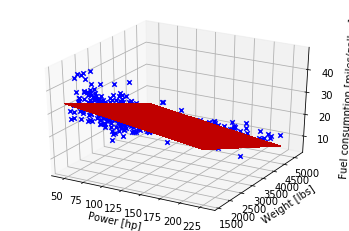

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot data points
for i in range(0,len(y)):
    ax.scatter(X[i,0], X[i,1], y[i], color='blue', marker='x')
# plot hyperplane
X0 = np.arange(min(X[:,0]), max(X[:,0]), 25)
X1 = np.arange(min(X[:,1]), max(X[:,1]), 25)
X0, X1 = np.meshgrid(X0, X1)
Z = X0.copy()
#shape returns the dimension of the array as a tuple (n,m)
n = X0.shape[0]
m = X0.shape[1]
#prediction
for i in range(0, n):
    for j in range(0, m):
        Z[i,j] = reg.predict([[X0[i,j], X1[i,j]]])
        
ax.plot_surface(X0, X1, Z, color='red', linewidth=0, antialiased=False)
ax.set_xlabel('Power [hp]')
ax.set_ylabel('Weight [lbs]')
ax.set_zlabel('Fuel consumption [miles/gallon]')
plt.show()